# Problems Identification: 

This project involves the implementation of efficient and effective MLP on MNIST data set. The MNIST data comprises of digital images of several digits ranging from 0 to 9. Each image is 28 x 28 pixels. Thus, the data set has 10 levels of classes.

These are the needed packages:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Implementation functions:

In [3]:
class Model:          
    def regr_poly(data, regularization=False):
        if regularization:
            print('\n\033[2;40;46m     Regression with Polynomial kernel & Ridge Regularization     \033[0;40;46m')
        else:
            print('\n\033[2;40;46m     Regression with Polynomial kernel     \033[0;40;46m')

        func = lambda x: x * np.sin(x)
        # generate points and keep a subset of them
        x = data.copy()
        rand = np.random.RandomState(0)
        rand.shuffle(x)
        x = np.sort(x[:50])
        y = func(x)

        # create matrix versions of these arrays
        X = x[:, np.newaxis]
        plot = data[:, np.newaxis]
        col = ['#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
        plt.subplots(2, 4, figsize=(24, 10))
        l1 = plt.subplot(2, 4, 1)
        #l1.plot(data, func(data), color='#737373', label="ground truth")
        l1.scatter(x, y, color='#253494', marker='o', label="training points")
        l1.legend()

        for i, degree in enumerate(range(1, 8)):
            model = None
            l1 = plt.subplot(2, 4, 2 + i)
            if regularization:
                model = make_pipeline(PolynomialFeatures(degree), Ridge())
                #l1.set_title('Regression with Polynomial kernel & Ridge Regularization')
            else:
                model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
                #l1.set_title('Regression with Polynomial kernel')

            model.fit(X, y)
            y_plt = model.predict(plot)
            l1.plot(data, y_plt, label="degree {}".format(degree), color=col[i])
            l1.scatter(x, y, color='#253494', marker='o', label="training points")
            l1.legend()

        plt.show()

# 1. Avoiding Curse of Dimensionality

Curse of dimensionality refers to the effect of increased dimension. As the dimensionality (features) increases, the needed amount of data for a generalized model grows exponentially. In other words, as you add more features to an input space, you will need more data to accurately build a good model. As the feature increases the needed data grows exponentially.

The effect of the curse of dimensionality can be reduced by reducing the number of features, this concept is called feature extraction. A typical example of feature extraction is PCA (Principal Component Analysis), it finds a subspace of lower dimension such that the features that have low explained variance on the data are eliminated.

### Implementation of PCA: 

Suppose the original data set has p features, PCA can be used to extrapolate those features with high variance explained in the data set, leading to a reduced q features dataset (p > q).

let $\pmb X$ be the original data matrices with n x p dimension.

The steps are outlined below:
1. It might be necessary to scale the data set, this will ensure that each of the features has same weight.
2. Derive the p x p covariance matrix of the data set:

    $$\sum = \frac{1}{P}\sum_{i=1}^{n}\left ( X^{\left ( i \right )} \right )^{T}\left ( X^{\left ( i \right )} \right )$$
    
3. Obtain the eigenvectors (or characteristic vectors) and eigenvalues from the covariance matrix <br>
   Let the covariance matrice be $\pmb A$ <br>
   If there is a vector $\pmb W \ \epsilon \ \Re ^{n} \ \neq \ \pmb 0$ such that <br>
   $\pmb A \pmb W = \lambda \pmb W$ <br>
   Where $\lambda$ is the eigenvalues and $\pmb W$ is the eigenvector of $\pmb A$ (the covariance matrix of the dataset) <br>
   <br> 
4. Plot cumulative variance explained by using sorted eigenvalues in descending order

5. Having gotten the eigenvectors, then transform the original datasets via basis vectors to obtain a reduced dimension       depending on the desired <b>explained variance</b>. Let the basis vector be: $\pmb B$ with p x q dimension

6. There lower dimension data set with q features is given by: $\pmb X \cdot \pmb B$ with dimension n x q

    

# 2. Generalization with regard to learning problems

<u>Why do we talk about generalization with regard to learning problems?</u><br>
Generalization in learning is contrasting notion of discrimination learning. Generalization learning can be seen as learning general concept from a specific example, and how well the general concept performs on new data (from the problem domain) that the model has not seen. Hence, generalization is important in order to avoid overfitting and overfitting. Generalization helps to achieve a tradeoff between overfitting and underfitting.

<u>What is overfitting in learning?</u><br>
Overfitting can be regarded as having low bias and high variance. This can occur when a model fails to efficiently generalize from the training dataset. Overfitting can also be viewed as when a model greatly performs on seen data while it poorly performs on unseen data.


### Explaining overfitting using regression with a polynomial basis set:


Below is the plot of fitting regression with polynomial kernel. The first plot shows the training data without fitting the model.


     Regression with Polynomial kernel     


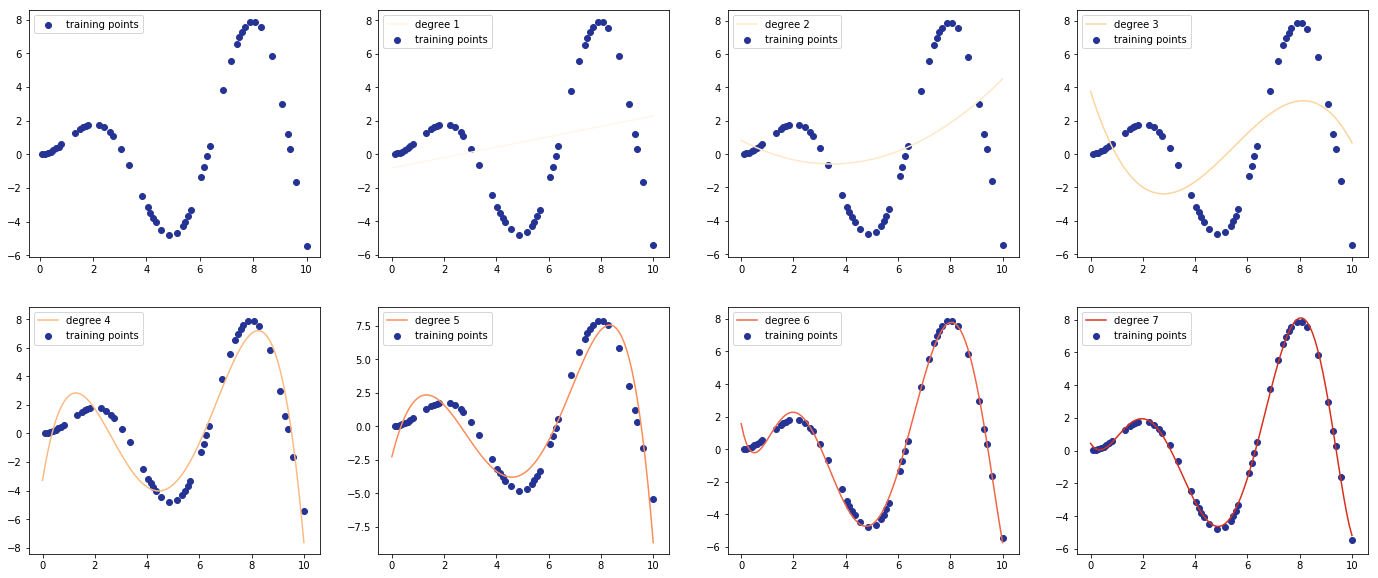

In [4]:
data = np.linspace(0, 10, 100)
Model.regr_poly(data)

As the degree of the polynomial basis increase, the model tends to have more overfitting. At degree 7, the will be increased variance and low bias. While degree 1 shows low variance and high bias. These deficiencies can be curtailed through regularization.

### How to avoid overfitting for the regression problem above:

Overfitting can simply be avoided through regularization. Regularization helps in ensuring that the model generalizes well, hence striking a balance between bias and variance.


     Regression with Polynomial kernel & Ridge Regularization     


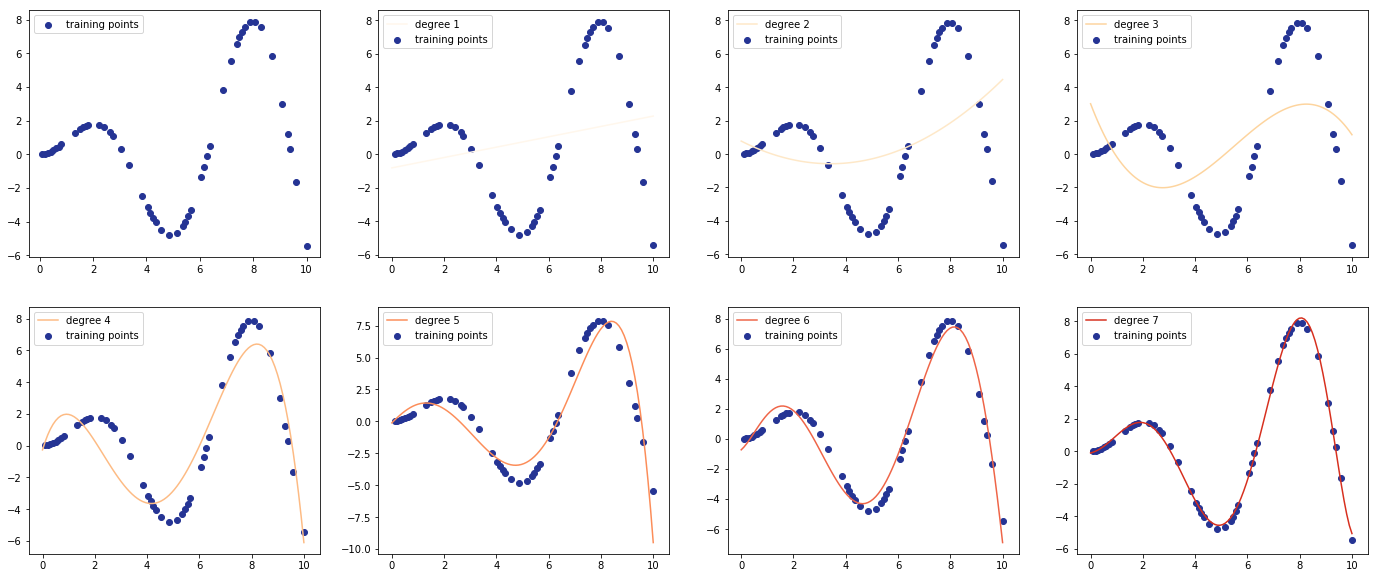

In [5]:
Model.regr_poly(data, regularization=True)

At high polynomial degree, regularization with ridge regularization tends to have a balance bias and variance trade-off. Hence, the ridge regularization helps to avoid overfitting the training set.